<a href="https://colab.research.google.com/github/JerryHung1103/ML/blob/PA2/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP 4331 2023 Fall Assignment 2


---



## Preparation

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn

## Task 1. Decision Tree

### Read Dataset and Preprocessing

Now you have the needed libraries in hand. Next, let's read the dataset from the source file to the project.  

We assume you are working in Google Colab. One way to read a dataset in Google Colab:
1. Download the source file and put it on your Google Drive
2. Import the `drive` module from `google.colab` package
3. Run `drive.mount` to mount your Google Drive to the Colab notebook
4. Use `pandas.read_csv` to read the data from Google Drive and store the data in pandas DataFrame

Todo:
Modify `YourFilePath` depending on the actual directory to read the data to this notebook.

Remarks:  
You can check whether your data reading is successful by running the next cell. The shape should be (4892, 12). You can also see the first 5 rows of the dataset.

In [ ]:
if __name__ == '__main__':
    from google.colab import drive
    drive.mount('/content/drive')
    # todo start #
    # please modify YourFilePath
    data_file = "/content/drive/MyDrive/xxx/Student_information_gender_datasets_v4.csv"
    data_df = pd.read_csv(data_file)
    # todo end #


Mounted at /content/drive


In [ ]:

### Split transformed_data into: X_train X_test y_train y_test using function data_split(split)
def data_split(data_df,split):

  data = data_df.iloc[:, :-1]
  target = data_df.iloc[:, -1]

  #change discrete features into one-hot encoding
  transformed_data = pd.get_dummies(data, columns=['Height', 'Weight', 'Math', 'Literature', 'Sports'])
  header = list(transformed_data)
  print('header')
  print(header)

  #change labels into binary encoding
  from sklearn import preprocessing
  lb = sklearn.preprocessing.LabelBinarizer()
  transformed_target = lb.fit_transform(target)[:,0]
  print('target')
  print(transformed_target)

  target_names = np.array(["Man", "Woman"], dtype="<U10")

  ##### Write your code below ####(score will be counted in P1-(a))
  X_test = transformed_data[:split]
  y_test = transformed_target[:split]
  X_train=transformed_data[split:]
  y_train=transformed_target[split:]
  ##### End of my code
  return X_train, X_test, y_train, y_test,target_names,header

if __name__=='__main__':
  split = 5
  X_train, X_test, y_train, y_test,_,_ = data_split(data_df,split)


header
['Height_150-160', 'Height_160-170', 'Height_170-180', 'Height_180-190', 'Weight_40-50', 'Weight_50-60', 'Weight_60-70', 'Weight_70-80', 'Math_No', 'Math_Yes', 'Literature_No', 'Literature_Yes', 'Sports_No', 'Sports_Yes']
target
[0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]


### (a)

header
['Height_150-160', 'Height_160-170', 'Height_170-180', 'Height_180-190', 'Weight_40-50', 'Weight_50-60', 'Weight_60-70', 'Weight_70-80', 'Math_No', 'Math_Yes', 'Literature_No', 'Literature_Yes', 'Sports_No', 'Sports_Yes']
target
[0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]


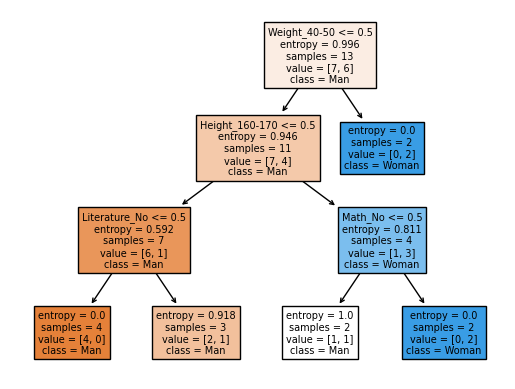

Tree node count: 9.0
Tree depth: 3.0
Accuracy score on train dataset: 0.85
Accuracy score on test dataset: 0.80


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split

# Define the DecisionTree_sklearn function
def DecisionTree_sklearn(data_df, criterion="entropy",  random_state=1, min_samples_split=4, max_depth=None):
    X_train, X_test, y_train, y_test,target_names,header = data_split(data_df,5)

    ### Decision tress classifier
    ##### Write your code below ####
    clf = DecisionTreeClassifier(criterion=criterion, random_state=random_state, min_samples_split=min_samples_split, max_depth=max_depth)
    clf.fit(X_train, y_train)
    ### Plot the decision tree
    ##### Write your code below ####
    plt.figure()
    plot_tree(clf, feature_names=X_train.columns, class_names=['Man', 'Woman'], filled=True)
    plt.show()
    ### node_count and depth
    ##### Write your code below ####
    node_count = clf.tree_.node_count
    depth = clf.tree_.max_depth
    ### train and test
    ##### Write your code below ####
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    ##### End of my code

    return node_count, depth, train_score, test_score



if __name__=='__main__':


    #define some parameters for DT
    random_state = 1
    min_samples_split = 4

    #define the criterion for DT
    criterion = "entropy"

    # Call the DecisionTree_sklearn function and get accuracy scores
    node_count, depth, train_score, test_score = DecisionTree_sklearn(data_df, criterion, random_state, min_samples_split)

    # Print the tree node count and tree depth
    print("Tree node count: {:.1f}".format(node_count))
    print("Tree depth: {:.1f}".format(depth))

    # Print the accuracy scores on the train and test datasets
    print("Accuracy score on train dataset: {:.2f}".format(train_score))
    print("Accuracy score on test dataset: {:.2f}".format(test_score))


### (b)

header
['Height_150-160', 'Height_160-170', 'Height_170-180', 'Height_180-190', 'Weight_40-50', 'Weight_50-60', 'Weight_60-70', 'Weight_70-80', 'Math_No', 'Math_Yes', 'Literature_No', 'Literature_Yes', 'Sports_No', 'Sports_Yes']
target
[0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]


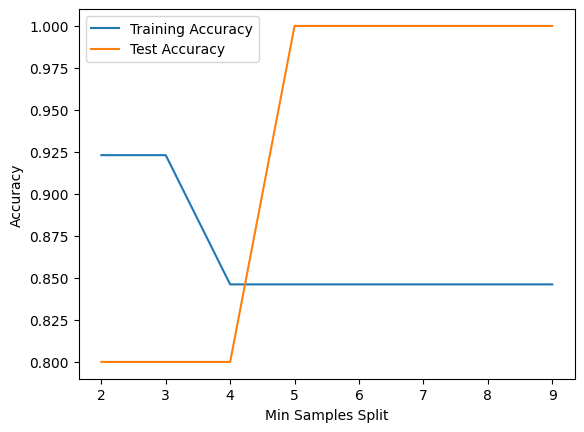

min_samples_split with best accuracy: 5
Test accuracy for each min_samples_split: [0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
# Define the function of finding the best min_samples_split for decision tree

def DT_msp(data_df, criterion):
  X_train, X_test, y_train, y_test,target_names,header = data_split(data_df,5)

  train_acc = []
  test_acc = []
  # define min samples split
  y = list(range(2, 10))
  min_samples_split_with_best_accuracy = None
  best_test_accuracy = 0

  # Iterate through different min_samples_split values
  for split in y:
      # Create a DecisionTreeClassifier with the current min_samples_split value
      clf = tree.DecisionTreeClassifier(criterion=criterion, random_state=1, min_samples_split=split)
      clf = clf.fit(X_train, y_train)

      ### Calculate and store training and test accuracy
      ##### Write your code below ####
      train_accuracy = clf.score(X_train, y_train)
      test_accuracy = clf.score(X_test, y_test)
      train_acc.append(train_accuracy)
      test_acc.append(test_accuracy)
      if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            min_samples_split_with_best_accuracy = split

  ### Plot the accuracy results
  ##### Write your code below ####
  plt.plot(y, train_acc, label='Training Accuracy')
  plt.plot(y, test_acc, label='Test Accuracy')
  plt.xlabel('Min Samples Split')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  return min_samples_split_with_best_accuracy, test_acc


if __name__ == '__main__':
  criterion = "entropy"
  acc_msp, test_acc = DT_msp(data_df, criterion)
  print("min_samples_split with best accuracy:", acc_msp)
  print("Test accuracy for each min_samples_split:", test_acc)

### (c)

header
['Height_150-160', 'Height_160-170', 'Height_170-180', 'Height_180-190', 'Weight_40-50', 'Weight_50-60', 'Weight_60-70', 'Weight_70-80', 'Math_No', 'Math_Yes', 'Literature_No', 'Literature_Yes', 'Sports_No', 'Sports_Yes']
target
[0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1]


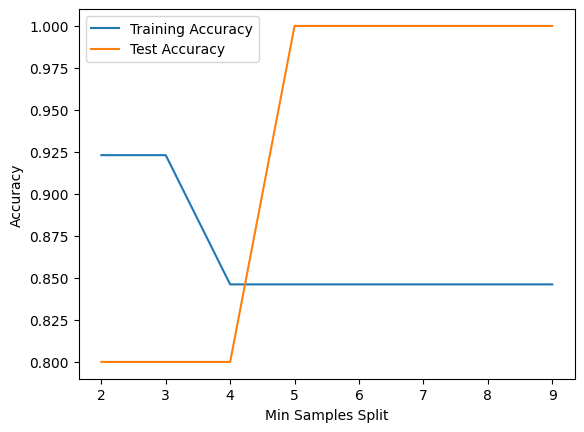

min_samples_split with best accuracy: 5
Test accuracy for each min_samples_split: [0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:

if __name__ == '__main__':
  ###choose the criterion and call finction DT_msp
  ##### Write your code below ####
  criterion = "gini"
  acc_msp, test_acc = DT_msp(data_df, criterion)
  print("min_samples_split with best accuracy:", acc_msp)
  print("Test accuracy for each min_samples_split:", test_acc)

### (d)

In [ ]:

import pandas as pd
import math
from sklearn import preprocessing

def ChooseAttribute(data_df):
    """
    Choose the attribute to be the root of the decision tree based on information gain.

    Args:
    data_df (pd.DataFrame): The input DataFrame.

    Returns:
    selected_attribute (str): The attribute selected as the root of the decision tree.
    """
    q1_data = data_df

    data = q1_data.iloc[5:, :]
    # data = data_df

    df = pd.DataFrame()
    target_name = 'Gender'
    for c in data:
        le = preprocessing.LabelEncoder()
        le.fit(data[c])
        df[c] = le.transform(data[c])
    ###function: get_entropy(total: int, counter: dict), calculate entropy
    ##### Write your code below ####

    stat = {}
    def get_entropy(total, counter):
        entropy = 0
        for value in counter.values():
            p = value / total
            entropy -= p * math.log2(p)
        return entropy

    ### call the function get_entropy to obtain the entropy_D
    ##### Write your code below ####
    total = len(df)
    counter = df[target_name].value_counts().to_dict()
    entropy_D = get_entropy(total, counter)
    #end of my code

    for c in df.iloc[:, :-1]:
        stat[c] = {}
        hashmap = {}
        for index, row in df.iterrows():
            hashmap.setdefault(row[c], {})
            if row[target_name] in hashmap[row[c]]:
                hashmap[row[c]][row[target_name]] += 1
            else:
                hashmap[row[c]][row[target_name]] = 1

        entropy = 0

          ### calculate entropy to obtain entropy_D
          ##### Write your code below ####
        for each in hashmap.keys():
          total=sum(hashmap[each].values())
          H=get_entropy(total, hashmap[each])
          entropy+=(H*total)/len(df)
          #end of my code

        stat[c]['entropy'] = entropy
        stat[c]['Gain'] = entropy_D - entropy

    return stat

if __name__ == '__main__':
    # Provide your data_df here

    # Call the core function to select the attribute
    state = ChooseAttribute(data_df)
    ###output selected_attribute and Gain
    ##### Write your code below ####
    selected_attribute = max(state, key=lambda x: state[x]['Gain'])
    Gain =state[selected_attribute]['Gain']
    #end of my code
    print("Attribute selected at the root of the decision tree:", selected_attribute, "{:.2f}".format(Gain))

Attribute selected at the root of the decision tree: Weight 0.34


###(e)

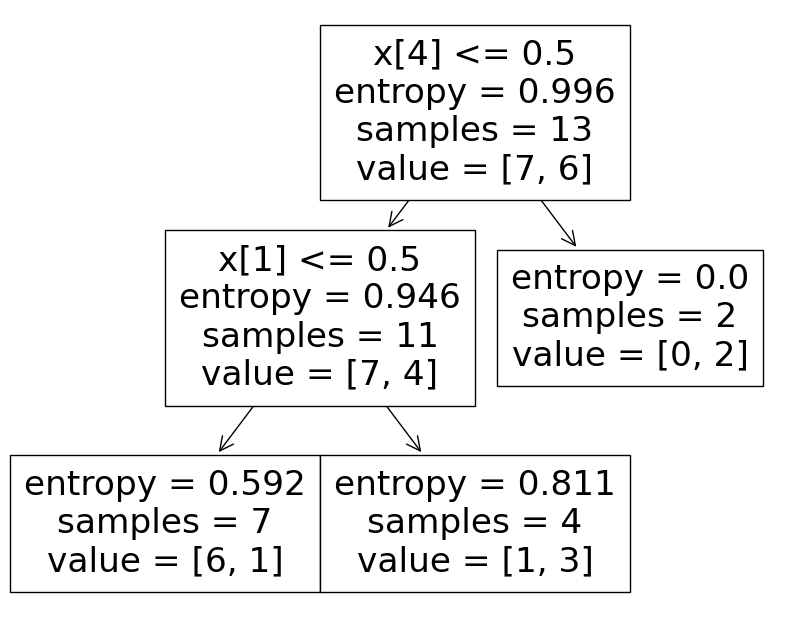

Accuracy score on train dataset:  0.85
Accuracy score on test dataset:  1.00


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score

if __name__ == '__main__':

    ### Specify the maximum depth for the decision tree and Call the core function to create and evaluate the decision tree
    ##### Write your code below ####
    max_depth = 2
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth,random_state=1 )#tree.DecisionTreeClassifier(criterion=criterion, random_state=1, min_samples_split=split)
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    train_score = accuracy_score(y_train, train_predictions)
    test_score = accuracy_score(y_test, test_predictions)
    plt.figure(figsize=(10, 8))
    plot_tree(clf)
    plt.show()
    #end of my code
    print("Accuracy score on train dataset:  {:.2f}".format(train_score))
    print("Accuracy score on test dataset:  {:.2f}".format(test_score))

## Task 2. Bayesian Classification

###Read Dataset

In [ ]:
if __name__ == '__main__':
    from google.colab import drive
    drive.mount('/content/drive')
# todo start #
# please modify YourFilePath
    data_file = "/content/drive/MyDrive/4331pa2/heart_failure_clinical_records_dataset.csv"
# todo end #
    data_df = pd.read_csv(data_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###(a)

In [ ]:
from sklearn import preprocessing
from sklearn.naive_bayes import CategoricalNB


def Bayes_sklearn(data_df, alpha=1):
    """
    Train and evaluate a Categorical Naive Bayes classifier.

    Args:
    data_df (pd.DataFrame): The input DataFrame containing the dataset.
    alpha (float, optional): Laplace correction parameter. Default is 1.

    Returns:
    acc (float): Accuracy of the Naive Bayes classifier.
    """

    col_names = ["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction",
                  "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking", "time"]
    y = data_df['DEATH_EVENT']
    x = data_df.drop(columns=[ 'DEATH_EVENT'])

    # do binning
    x['age'] = pd.cut(x['age'], bins=[0, 50, 100], labels=['young', 'old'])
    x['creatinine_phosphokinase'] = pd.cut(x['creatinine_phosphokinase'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000'])
    x['ejection_fraction'] = pd.cut(x['ejection_fraction'], bins=[0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'])
    x['platelets'] = pd.cut(x['platelets'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k'])
    x['serum_creatinine'] = pd.cut(x['serum_creatinine'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
    x['serum_sodium'] = pd.cut(x['serum_sodium'], bins=[110, 120, 130, 140, 150], labels=['110-120', '120-130', '130-140', '140-150'])
    x['time'] = pd.cut(x['time'], bins=[0, 100, 200, 300], labels=['0-100', '1000-200', '200-300'])


    ###using OrdinalEncoder to encode data, transformed into mappings_x_nb
    ##### Write your code below ####
    ord_enc = preprocessing.OrdinalEncoder()
    mappings_x_nb = ord_enc.fit_transform(x)

    ### Create the Categorical Naive Bayes classifier with Laplace correction
    ##### Write your code below ####
    clf = CategoricalNB(alpha=alpha)

    ### Train the classifier and calculate accuracy
    ##### Write your code below ####
    clf.fit(mappings_x_nb, y)
    y_pred = clf.predict(mappings_x_nb)
    accuracy = accuracy_score(y, y_pred)
    #end of my code
    return accuracy

if __name__ == '__main__':
    # Specify the Laplace correction parameter (alpha)
    alpha = 1

    # Call the core function to train and evaluate the Naive Bayes classifier
    accuracy = Bayes_sklearn(data_df, alpha)


    print("Accuracy of bayes clasification by sklearn: {:.2f}%".format(accuracy * 100))



Accuracy of bayes clasification by sklearn: 79.26%


###(b)

In [ ]:
def Bayes_manual(data_df, alpha=1):
    """
    Perform Naive Bayes classification manually and compute accuracy.

    Args:
    data_df (pd.DataFrame): The input DataFrame containing the dataset.
    alpha (int, optional): Laplace correction parameter. Default is 1.

    Returns:
    acc (float): Accuracy of the Naive Bayes classifier.
    """

    col_names = ["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction",
                  "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking", "time"]
    x = data_df.drop(columns=['DEATH_EVENT'])

    x['age'] = pd.cut(x['age'], bins=[0, 50, 100], labels=['young', 'old'])
    x['creatinine_phosphokinase'] = pd.cut(x['creatinine_phosphokinase'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000], labels=['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000'])
    x['ejection_fraction'] = pd.cut(x['ejection_fraction'], bins=[0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'])
    x['platelets'] = pd.cut(x['platelets'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], labels=['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k', '600k-700k', '700k-800k', '800k-900k'])
    x['serum_creatinine'] = pd.cut(x['serum_creatinine'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
    x['serum_sodium'] = pd.cut(x['serum_sodium'], bins=[110, 120, 130, 140, 150], labels=['110-120', '120-130', '130-140', '140-150'])
    x['time'] = pd.cut(x['time'], bins=[0, 100, 200, 300], labels=['0-100', '1000-200', '200-300'])

    enc = preprocessing.OrdinalEncoder()
    x_encoded = enc.fit_transform(x[col_names])

    y = data_df['DEATH_EVENT']
    x = x_encoded

    # update data_df using x_encoded
    data_df_transformed = data_df.copy()
  #  data_df_transformed.iloc[:, 0:12] = x_encoded
    data_df_transformed[data_df.columns[0:12]] = x_encoded

    class_stat_dict = {}
    attribute_stat_dict = {}
    attribute_distint_dict = {}

    for i, row in data_df_transformed.iterrows():
        class_name = row["DEATH_EVENT"]
        current_number = class_stat_dict.get(class_name, 0)
        class_stat_dict[class_name] = current_number + 1

        for attribute in col_names:
            attribute_value = row[attribute]

            if attribute not in attribute_distint_dict:
                attribute_distint_dict[attribute] = set()
            attribute_distint_dict[attribute].add(attribute_value)

            attribute_key = (class_name, attribute, attribute_value)
            current_number = attribute_stat_dict.get(attribute_key, 0)
            attribute_stat_dict[attribute_key] = current_number + 1

    total_num = sum(class_stat_dict.values())
    class_names = data_df["DEATH_EVENT"].unique()

    def predict(row):
        probabilities = []
        for class_name in class_names:

            ### calculate the prior probability
            ##### Write your code below ####
            prior_prob = (class_stat_dict[class_name] + alpha) / (total_num + alpha * len(class_names))
            ### calculate the conditional probability
            ##### Write your code below ####
            likelihood = 1
            for attribute in col_names:
                attribute_value = row[attribute]
                attribute_key = (class_name, attribute, attribute_value)

                attribute_count = attribute_stat_dict.get(attribute_key, 0)
                class_count = class_stat_dict[class_name]
                attribute_distint_count = len(attribute_distint_dict[attribute])

                conditional_prob = (attribute_count + alpha) / (class_count + alpha * attribute_distint_count)
                likelihood *= conditional_prob

            probabilities.append(prior_prob * likelihood)
        return class_names[np.argmax(probabilities)]

    data_df_transformed["prediction_nb_manual"] = data_df_transformed.apply(predict, axis=1)

    # Compute accuracy
    acc = sum(data_df_transformed["DEATH_EVENT"] == data_df_transformed["prediction_nb_manual"]) / len(data_df_transformed)
    return acc

if __name__ == '__main__':
    # Provide your data_df and alpha (Laplace correction parameter) here
    alpha = 1

    # Call the core function to perform Naive Bayes classification and compute accuracy
    accuracy = Bayes_manual(data_df, alpha)

    print("Accuracy of bayes clasification by manual: {:.2f}%".format(accuracy * 100))


Accuracy of bayes clasification by manual: 79.26%


###(c)

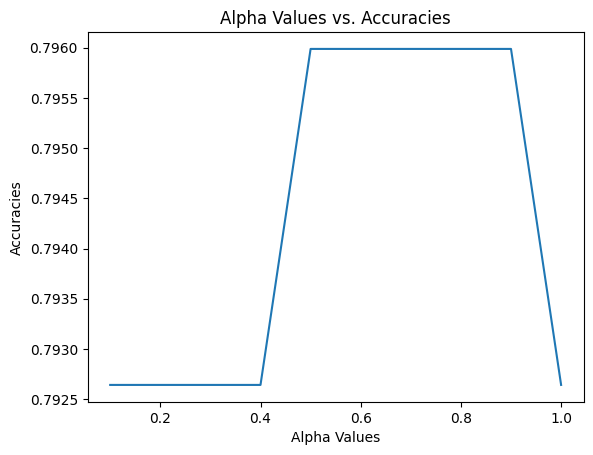

Best alpha value with the highest testing accuracy: 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def best_alpha_accuracy(data_df):
    ###define the alphas range and Call the core function to perform Naive Bayes classification and compute accuracy
    ##### Write your code below ####
    alphas = np.arange(0.1, 1.1, 0.1)
    ### plot
    ##### Write your code below ####
    accuracies = []
    for alpha in alphas:
        accuracy = Bayes_manual(data_df, alpha)
        accuracies.append(accuracy)

    plt.plot(alphas, accuracies)
    plt.title("Alpha Values vs. Accuracies")
    plt.xlabel("Alpha Values")
    plt.ylabel("Accuracies")
    plt.show()
    ## return best_alpha
    best_alpha = alphas[np.argmax(accuracies)]
    return best_alpha

if __name__ == '__main__':

    best_alpha=best_alpha_accuracy(data_df)

    print("Best alpha value with the highest testing accuracy: {:.1f}".format(best_alpha))